In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
df = pd.read_csv('cv_online/5341.csv', header=None)
df['remaining'] = df.loc[:,2] - df.loc[:,1]
df.drop_duplicates(inplace=True)
df['mov_pred'] = df[3].rolling(5).mean().fillna(method='bfill') + df[1]
df['err'] = df[2] - df['mov_pred']
df.head(10)

,0,1,2,3,4,remaining,mov_pred,err
0,5341,1,413,444.9,-32.9,412,419.32,-6.32
1,5341,2,413,445.2,-34.2,411,420.32,-7.32
2,5341,3,413,450.8,-40.8,410,421.32,-8.32
3,5341,4,413,371.7,37.3,409,422.32,-9.32
4,5341,5,413,379.0,29.0,408,423.32,-10.32
5,5341,6,413,447.6,-40.6,407,424.86,-11.86
6,5341,7,413,447.6,-41.6,406,426.34,-13.34
7,5341,8,413,456.6,-51.6,405,428.50,-15.50
8,5341,9,413,456.6,-52.6,404,446.48,-33.48
9,5341,10,413,392.6,10.4,403,450.20,-37.20


In [3]:
df.describe()

,0,1,2,3,4,remaining,mov_pred,err
count,413.0,413.000000,413.0,413.000000,413.000000,413.000000,413.000000,413.000000
mean,5341.0,207.000000,413.0,258.591041,-52.591041,206.000000,467.506877,-54.506877
std,0.0,119.367081,0.0,141.555263,61.780273,119.367081,45.916173,45.916173
min,5341.0,1.000000,413.0,0.900000,-307.200000,0.000000,366.540000,-192.340000
25%,5341.0,104.000000,413.0,140.500000,-88.700000,103.000000,430.060000,-82.880000
50%,5341.0,207.000000,413.0,277.300000,-40.800000,206.000000,457.360000,-44.360000
75%,5341.0,310.000000,413.0,356.600000,-10.100000,309.000000,495.880000,-17.060000
max,5341.0,413.000000,413.0,689.200000,107.200000,412.000000,605.340000,46.460000


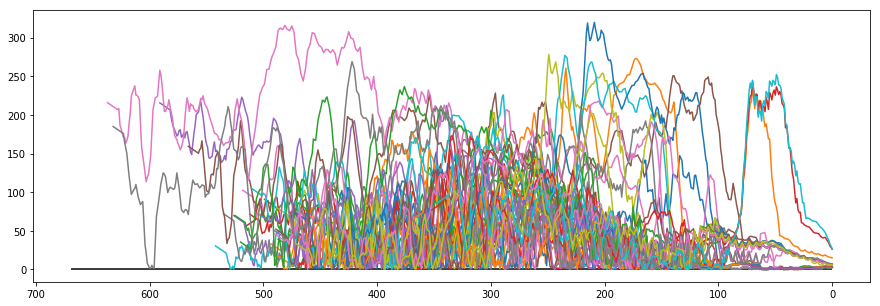

23199


In [24]:
fig = plt.figure(figsize=(15,5))
tot_df = pd.DataFrame()
for fn in os.listdir('cv_online/'):
    df = pd.read_csv('cv_online/%s'%fn, header=None)
    df.drop_duplicates(inplace=True)
    df['mov_pred'] = df[3].rolling(10).mean().fillna(method='bfill') + df[1]
    df['err'] = abs(df[2] - df['mov_pred'])
    df['remaining'] = df.loc[:,2] - df.loc[:,1]
    tot_df = pd.concat([tot_df, df], axis = 0)
    plt.plot(df['remaining'], df['err'])
plt.hlines(0, xmin = 0, xmax = plt.xlim()[1])
ax = plt.gca()
ax.invert_xaxis()
plt.show()
print(len(tot_df))

In [25]:
tot_df.head()

,0,1,2,3,4,mov_pred,err,remaining
0,5341,1,413,444.9,-32.9,430.26,17.26,412
1,5341,2,413,445.2,-34.2,431.26,18.26,411
2,5341,3,413,450.8,-40.8,432.26,19.26,410
3,5341,4,413,371.7,37.3,433.26,20.26,409
4,5341,5,413,379.0,29.0,434.26,21.26,408


In [26]:
aggr = tot_df.groupby(by=['remaining']).aggregate({'err': 'mean'})
print(aggr.head(), aggr.tail())

              err
remaining        
0          5.1992
1          5.0980
2          5.2636
3          5.5478
4          5.8636               err
remaining        
633        211.82
634        212.82
635        213.82
636        214.82
637        215.82


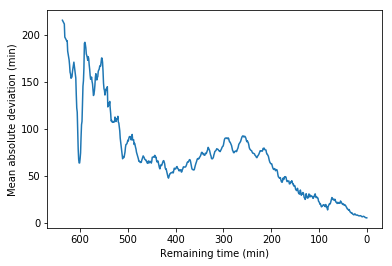

In [28]:
plt.plot(aggr)
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('Remaining time (min)')
plt.ylabel('Mean absolute deviation (min)')
plt.show()